# 1.Import the package

In [11]:
import os
import numpy as np
from PIL import Image

# from sklearn.metrics import accuracy_score
# Classification package
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

# Regression package
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2.Classification
## 2.1 Data loadind

In [12]:
# Load the image from classification
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path).convert('RGB')  # Load as RGB
        img = img.resize((128, 128), Image.Resampling.LANCZOS)   # unifty to image size 
        # labels.append(int(filename.split('_')[0]))  # Adjust based on your filename format
        img_array = np.array(img).flatten()  # flatten all the image to 1-demension array
        images.append(img_array)
    return np.array(images)

folder1 = 'Data/Image/Classification/brain_tumor_dataset/healthy'
folder2 = 'Data/Image/Classification/brain_tumor_dataset/Tumor'  

images1 = load_images_from_folder(folder1)
images2 = load_images_from_folder(folder2)

labels1 = np.zeros(len(images1))  # health
labels2 = np.ones(len(images2))    # tumor

# concat the image and label
X = np.vstack((images1, images2))
y = np.concatenate((labels1, labels2))

print(X.shape)
print(y.shape)

# Devide to traing set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(253, 49152)
(253,)


## 2.2 KNN evaluation

In [13]:
def knnEvaluate(model,train_X,train_Y):
    kf = KFold(n_splits=5)
    predicted_outputs = []
    actual_outputs = []
    
    for (train_index, test_index) in kf.split(train_X):
        training_set_X = [train_X[i] for i in train_index]
        training_set_Y = [train_Y[i] for i in train_index]
        val_set_X = [train_X[i] for i in test_index]
        val_set_Y = [train_Y[i] for i in test_index]
        # model = KNeighborsClassifier(n_neighbors=k)
        model.fit(training_set_X, training_set_Y)
        predicted_output = model.predict(val_set_X)
        predicted_outputs.extend(predicted_output)
        actual_outputs.extend(val_set_Y)
        
    # print(confusion_matrix(actual_outputs, predicted_outputs))
    # accuracy = accuracy_score(actual_outputs, predicted_outputs)
    #f1 = f1_score(actual_outputs, predicted_outputs)
    # print(f'Accuracy: {accuracy * 100:.2f}%')
    # print(f'F1: {f1 * 100:.2f}%')
    return actual_outputs,predicted_outputs

## 2.3 Choose various hyperparameters for different model

In [14]:
# list the model we want to use
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    'Support Vector Machine': (SVC(), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10, 15]}),
    'Multi-Layer Perceptron': (MLPClassifier(max_iter=2000), {'hidden_layer_sizes': [(64,), (128,),(256,)]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]})
}

## 2.4 Model Training and Evaluation

Training Logistic Regression...
{'C': 0.001}
Parameters: {'C': 0.001}, F1 Score: 0.8032
{'C': 0.01}
Parameters: {'C': 0.01}, F1 Score: 0.7967
{'C': 0.1}
Parameters: {'C': 0.1}, F1 Score: 0.7805
{'C': 1.0}
Parameters: {'C': 1.0}, F1 Score: 0.7755
{'C': 10.0}
Parameters: {'C': 10.0}, F1 Score: 0.7787
Best parameters for Logistic Regression: {'C': 0.001} with F1 Score: 0.8032

              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79        20
         1.0       0.85      0.90      0.88        31

    accuracy                           0.84        51
   macro avg       0.84      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51

[[15  5]
 [ 3 28]]


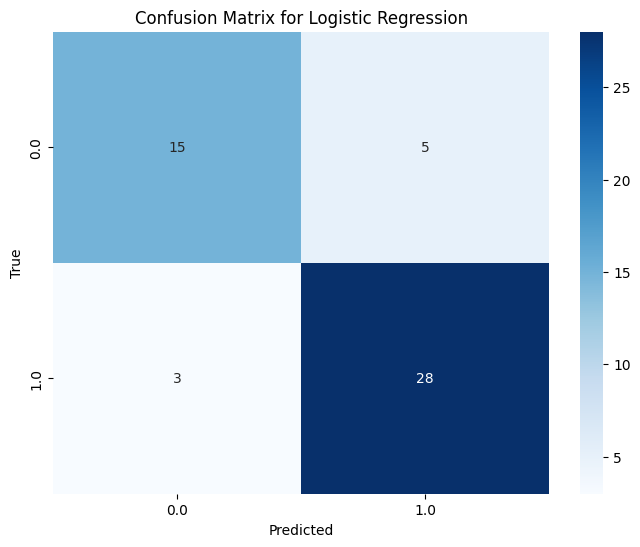

Training Support Vector Machine...
{'C': 0.1}
Parameters: {'C': 0.1}, F1 Score: 0.7607
{'C': 1.0}
Parameters: {'C': 1.0}, F1 Score: 0.8108
{'C': 10.0}
Parameters: {'C': 10.0}, F1 Score: 0.8217
Best parameters for Support Vector Machine: {'C': 10.0} with F1 Score: 0.8217

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        20
         1.0       0.86      1.00      0.93        31

    accuracy                           0.90        51
   macro avg       0.93      0.88      0.89        51
weighted avg       0.92      0.90      0.90        51

[[15  5]
 [ 0 31]]


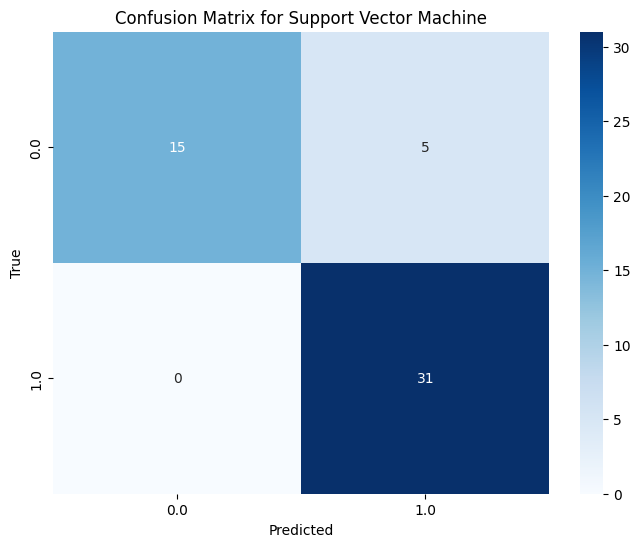

Training Decision Tree...
{'max_depth': None}
Parameters: {'max_depth': None}, F1 Score: 0.7724
{'max_depth': 5}
Parameters: {'max_depth': 5}, F1 Score: 0.7920
{'max_depth': 10}
Parameters: {'max_depth': 10}, F1 Score: 0.7837
{'max_depth': 15}
Parameters: {'max_depth': 15}, F1 Score: 0.7521
Best parameters for Decision Tree: {'max_depth': 5} with F1 Score: 0.7920

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76        20
         1.0       0.82      0.90      0.86        31

    accuracy                           0.82        51
   macro avg       0.82      0.80      0.81        51
weighted avg       0.82      0.82      0.82        51

[[14  6]
 [ 3 28]]


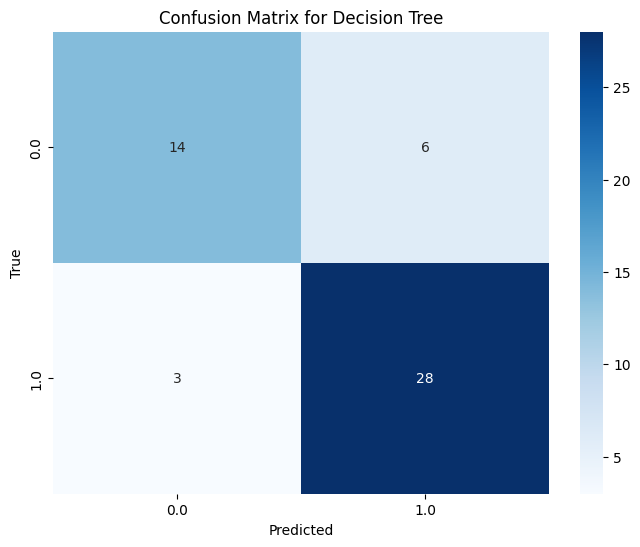

Training Multi-Layer Perceptron...
{'hidden_layer_sizes': np.int64(64)}
Parameters: {'hidden_layer_sizes': np.int64(64)}, F1 Score: 0.5291
{'hidden_layer_sizes': np.int64(128)}
Parameters: {'hidden_layer_sizes': np.int64(128)}, F1 Score: 0.6486
{'hidden_layer_sizes': np.int64(256)}
Parameters: {'hidden_layer_sizes': np.int64(256)}, F1 Score: 0.7652
Best parameters for Multi-Layer Perceptron: {'hidden_layer_sizes': np.int64(256)} with F1 Score: 0.7652

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86        20
         1.0       0.96      0.84      0.90        31

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.90      0.88      0.88        51

[[19  1]
 [ 5 26]]


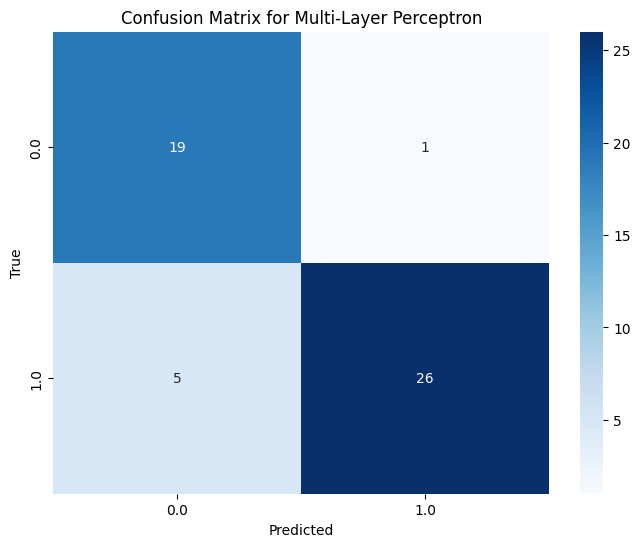

Training Random Forest...
{'n_estimators': np.int64(50)}
Parameters: {'n_estimators': np.int64(50)}, F1 Score: 0.8032
{'n_estimators': np.int64(100)}
Parameters: {'n_estimators': np.int64(100)}, F1 Score: 0.8405
{'n_estimators': np.int64(200)}
Parameters: {'n_estimators': np.int64(200)}, F1 Score: 0.8379
Best parameters for Random Forest: {'n_estimators': np.int64(100)} with F1 Score: 0.8405

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89        20
         1.0       0.91      0.97      0.94        31

    accuracy                           0.92        51
   macro avg       0.93      0.91      0.92        51
weighted avg       0.92      0.92      0.92        51

[[17  3]
 [ 1 30]]


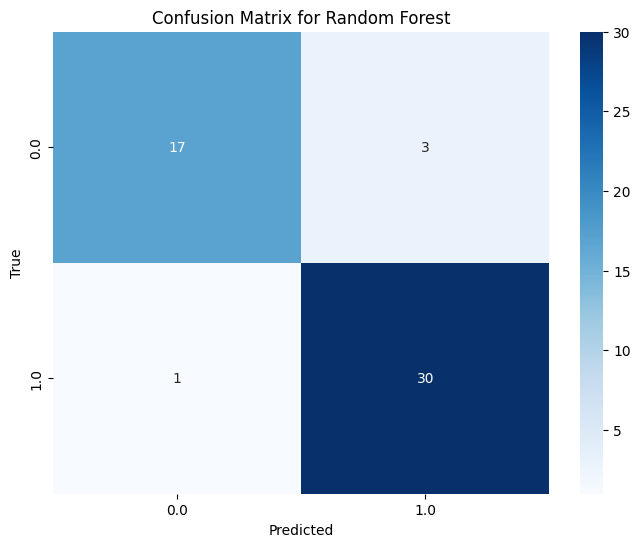

In [15]:
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    
    best_f1 = 0
    best_params = None
    
    # Loop througn the hyparameter
    for params in np.array(np.meshgrid(*param_grid.values())).T.reshape(-1, len(param_grid)):
        param_dict = dict(zip(param_grid.keys(), params))
        # print(param_dict)
        
        # Ensure 'C' is float
        if 'C' in param_dict:
            param_dict['C'] = float(param_dict['C'])
        print(param_dict)
        model.set_params(**param_dict)  # Set the hyperparameter
        
        actual_y,pred_y = knnEvaluate(model,X_train,y_train)
        f1 = f1_score(actual_y,pred_y)
        print(f"Parameters: {param_dict}, F1 Score: {f1:.4f}")

        # memeorize the hyperparameter
        if f1 > best_f1:
            best_f1 = f1
            best_params = param_dict

    print(f"Best parameters for {model_name}: {best_params} with F1 Score: {best_f1:.4f}\n")
    
    # train the best hyperparameter
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    
    # predict
    y_pred = model.predict(X_test)

    # calculte accuracy, recall and f1
    print(classification_report(y_test, y_pred))

    # generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(8, 6))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 3.Regression
## 3.1 Data Loading

In [16]:
df = pd.read_csv('Data/Image/Regression/house/house_price_regression_dataset.csv')

# 2. Select features and target (assuming 'price' is the target)
X = df.drop("House_Price", axis=1).to_numpy()
y = df['House_Price'].to_numpy()
# y = y.reshape(-1, 1)
# y_scaled = scaler.fit_transform(y)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X[0])
# print(y[0])
# print(len(X))
# print(len(X_train_reg))
# print(type(X_train_reg))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


## 3.2 Choose various hyperparameters for different model

In [17]:
# models_reg = {
#     'Linear Regression': (LinearRegression(), {}),
    
#     'Polynomial Regression': (
#         Pipeline([
#             ('poly', PolynomialFeatures()),  # Step name is 'poly'
#             ('linear', LinearRegression())   # Linear regression as the final step
#         ]), 
#         {'poly__degree': [2, 3]}  # You can specify degrees here
#     ),
    
#     'Support Vector Machine': (SVR(), 
#                                {'C': [0.1, 1.0, 10.0]}),
    
#     'Multi-layer Perceptron': (MLPRegressor(max_iter=5000), 
#                                {'hidden_layer_sizes': [(50,), (100,)],'learning_rate_init': [0.001]}),
    
#     'Ridge Regression': (Ridge(), {'alpha': [0.1, 1.0, 10.0]})
# }

# Define your models and the hyperparameter grids for manual tuning
models_reg = {
    'Linear Regression': (LinearRegression(), {}),
    
    'Polynomial Regression': (Pipeline([('poly', PolynomialFeatures()), 
                                        ('linear', LinearRegression())]), 
                              {'poly__degree': [1, 2, 3]}),
    
    
    'Support Vector Machine': (SVR(), 
                               { 'kernel': ['linear', 'rbf']}),
    
    'Multi-layer Perceptron': (MLPRegressor(max_iter=10000), 
                               {'hidden_layer_sizes': [(50,), (100,), (150,)]
                                # , 'alpha': [0.0001, 0.001]
                               }),
    
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1.0, 10.0]})
}


## 2.4 Model Training and Evaluation

Training Linear Regression...
No hyperparameter tuning required for Linear Regression with mse Score:95177250.1841

Linear Regression - Final MSE: 101434798.5056678


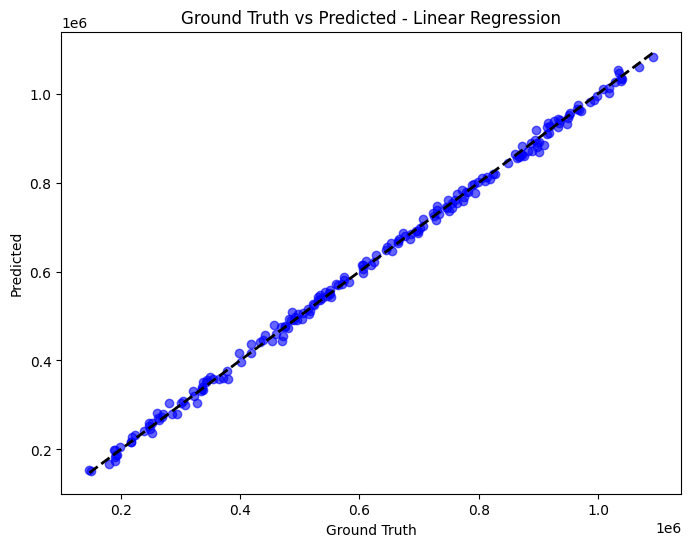

Training Polynomial Regression...
Parameters: {'poly__degree': np.int64(1)}, mse Score: 95177250.1841
Parameters: {'poly__degree': np.int64(2)}, mse Score: 133424151.7646
Parameters: {'poly__degree': np.int64(3)}, mse Score: 124349207.7442
Best parameters for Polynomial Regression: {'poly__degree': np.int64(1)} with mse Score: 95177250.1841

Polynomial Regression - Final MSE: 101434798.5056366


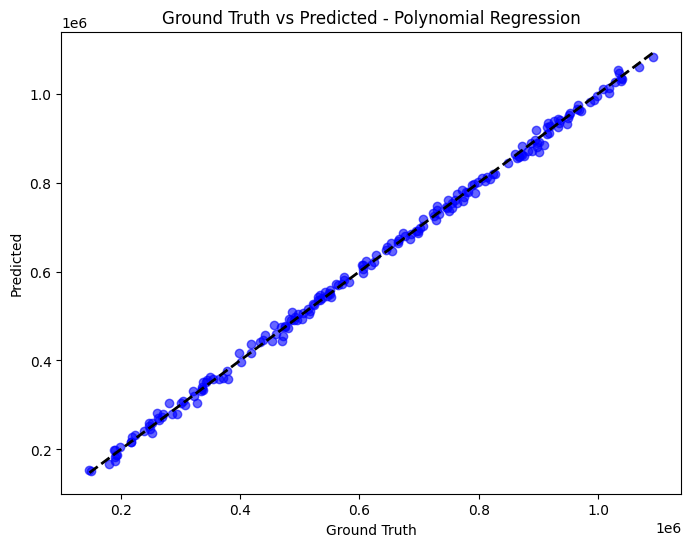

Training Support Vector Machine...
Parameters: {'kernel': np.str_('linear')}, mse Score: 729704260.3376
Parameters: {'kernel': np.str_('rbf')}, mse Score: 64297029280.7948
Best parameters for Support Vector Machine: {'kernel': np.str_('linear')} with mse Score: 729704260.3376

Support Vector Machine - Final MSE: 753919697.960854


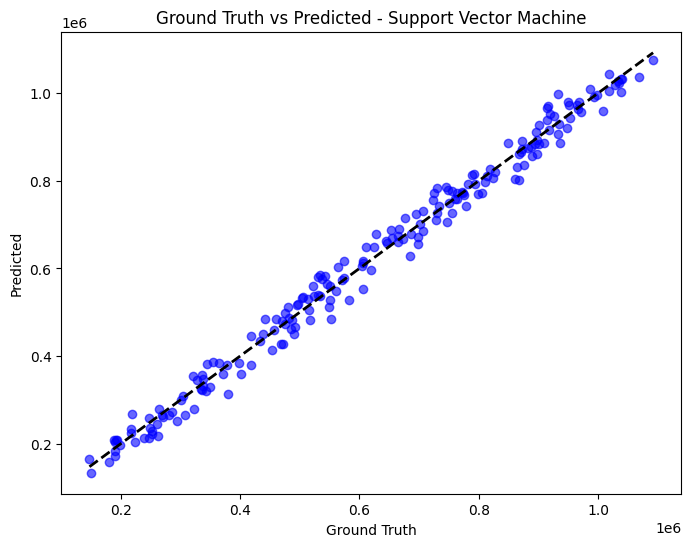

Training Multi-layer Perceptron...
Parameters: {'hidden_layer_sizes': np.int64(50)}, mse Score: 1094285791.5291
Parameters: {'hidden_layer_sizes': np.int64(100)}, mse Score: 1097270848.8972
Parameters: {'hidden_layer_sizes': np.int64(150)}, mse Score: 1094110334.2720
Best parameters for Multi-layer Perceptron: {'hidden_layer_sizes': np.int64(150)} with mse Score: 1094110334.2720

Multi-layer Perceptron - Final MSE: 951784250.0177014


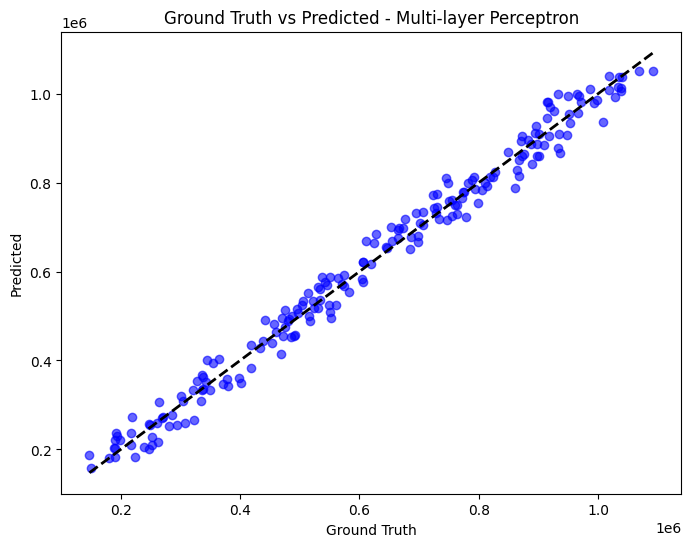

Training Ridge Regression...
Parameters: {'alpha': np.float64(0.1)}, mse Score: 95176933.7745
Parameters: {'alpha': np.float64(1.0)}, mse Score: 95174783.9705
Parameters: {'alpha': np.float64(10.0)}, mse Score: 95220494.0179
Best parameters for Ridge Regression: {'alpha': np.float64(1.0)} with mse Score: 95174783.9705

Ridge Regression - Final MSE: 101438129.73240608


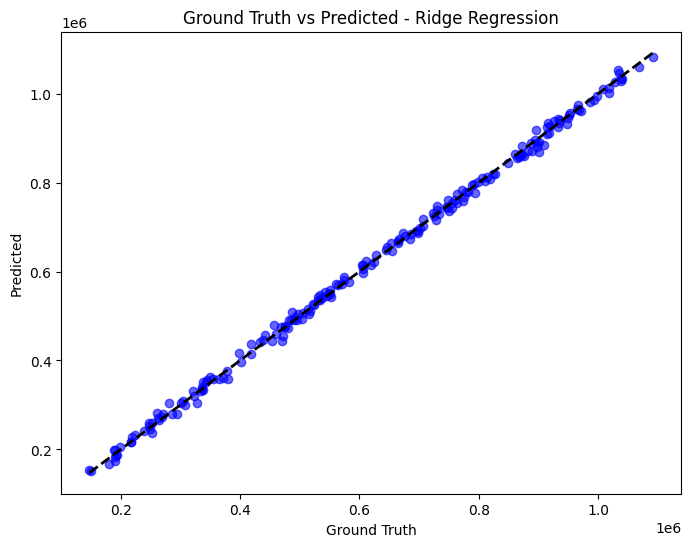

In [18]:
for model_name, (model, param_grid) in models_reg.items():
    print(f"Training {model_name}...")
    
    best_mse = float('inf')
    best_params = None
    if param_grid:
        # loop through hyperparameter
        for params in np.array(np.meshgrid(*param_grid.values())).T.reshape(-1, len(param_grid)):
            param_dict = dict(zip(param_grid.keys(), params))
            model.set_params(**param_dict)  # set
            actual_y_reg,pred_y_reg = knnEvaluate(model,X_train_reg,y_train_reg)
            
            mse = mean_squared_error(actual_y_reg,pred_y_reg)
            print(f"Parameters: {param_dict}, mse Score: {mse:.4f}")
            
            if mse < best_mse:
                best_mse = mse
                best_params = param_dict
        print(f"Best parameters for {model_name}: {best_params} with mse Score: {best_mse:.4f}\n")
        model.set_params(**best_params)
    else: 
         # For models with no hyperparameters (like Linear Regression), fit directly
        actual_y_reg,pred_y_reg = knnEvaluate(model,X_train_reg,y_train_reg)
            
        mse = mean_squared_error(actual_y_reg,pred_y_reg)
        print(f"No hyperparameter tuning required for {model_name} with mse Score:{mse:.4f}\n")
        
    # train best
    
    model.fit(X_train_reg, y_train_reg)
    
    # predict best
    y_pred_reg = model.predict(X_test_reg)

    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"{model_name} - Final MSE: {mse}")
    # Scatter plot for each model
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.6)
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)  # Perfect prediction line
    plt.xlabel('Ground Truth')
    plt.ylabel('Predicted')
    plt.title(f'Ground Truth vs Predicted - {model_name}')
    plt.show()